# Predicting House Prices

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ML">Machine Learning Models</a></li>
<li><a href="#RM">Retreain models</a></li>  
<li><a href="#DM">DeepLearning Model</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

<a id='wrangling'></a>
## Data Wrangling

- Loading the data and investigating it to determine the required cleanning process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#checking for data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#checking for missing data 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- There is no null data, good.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
#checking features which correlated with our label
df.corr()["price"].sort_values()

C:\Users\user\AppData\Local\Temp\ipykernel_7320\3091827432.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["price"].sort_values()


zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

- The variable that affects the price the most is 'sqft_living'.

The 'id' column is meaningless for this problem so, I dropped it. Also, I will remove the 'zipcode' column, the 'date' column is non-numeric, but I don't want to drop it so I'll split it into 2 parts 'month' and 'year'.

In [7]:
df = df.drop("id",axis=1)
df=df.drop("zipcode",axis=1)

In [8]:
df["date"]=pd.to_datetime(df["date"])

In [9]:
df["year"] = df["date"].apply(lambda date : date.year)
df["month"] = df["date"].apply(lambda date : date.month)

In [10]:
df =df.drop("date",axis=1)

In [11]:
df["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

The value of 0 whcih means that it's not be renovated.
So by logic we change it to the year it been built in.

In [12]:
def yr_change(cols):
    yr_renovated = cols[0]
    yr_built = cols[1]
    
    if yr_renovated == 0 :
        return yr_built 
    else :
        return yr_renovated

In [13]:
df["yr_renovated"] = df[["yr_renovated","yr_built"]].apply(yr_change,axis=1)

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,47.6168,-122.045,1800,7503,2015,2


In [15]:
df["yr_renovated"].value_counts()

2014    650
2005    485
2006    477
2004    459
2003    455
       ... 
1901     28
1902     25
1933     23
1935     19
1934     14
Name: yr_renovated, Length: 116, dtype: int64

In [16]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
df[df["bedrooms"]==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
15856,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,1947,47.6878,-122.331,1330,4700,2014,6


by looking in 'bedrooms' columns we found that there are one have 33 bedrooms with another nonlogic data.
So it will be wrong input and we will drop it.

In [18]:
df.drop(df[df["bedrooms"]==33].index,inplace=True)

<a id='eda'></a>
# Exploratory Data Analysis

## Histogram represents the dataset factors

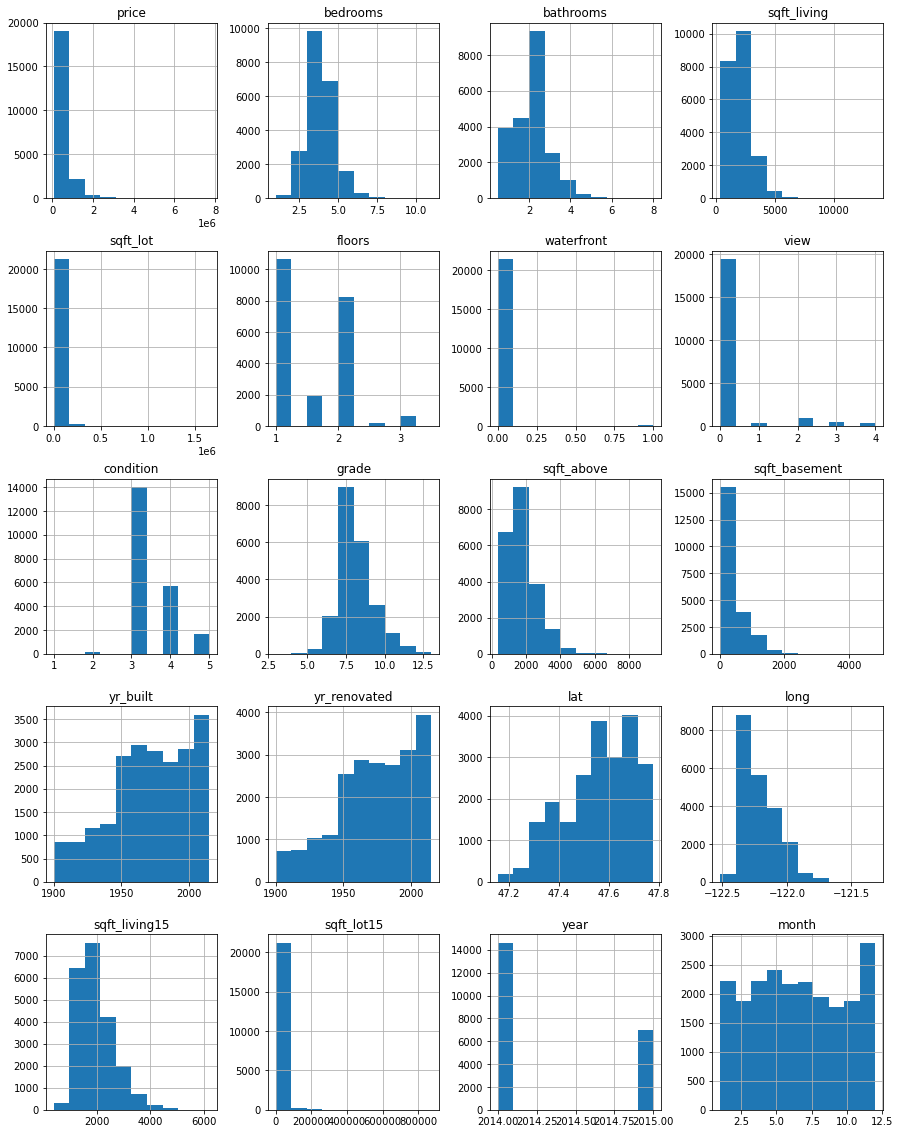

In [19]:
df.hist(figsize=(15,20));

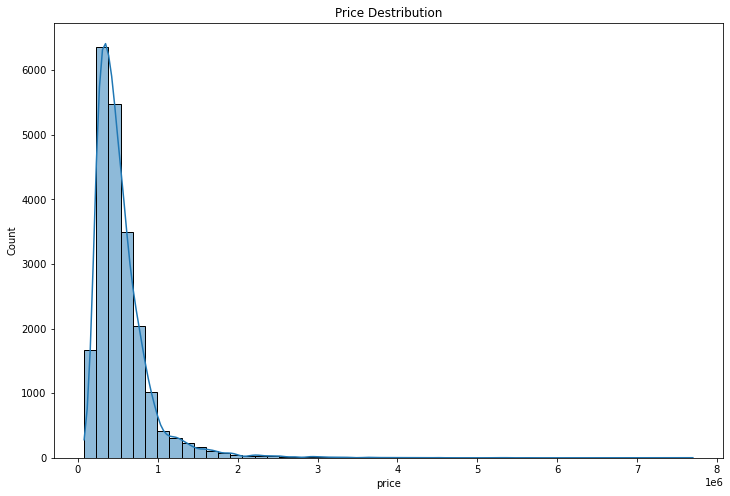

In [20]:
plt.figure(figsize=(12,8))
plt.title("Price Destribution");
sns.histplot(df['price'],kde=True,bins=50);

It's right skewed Histogram, so i think we should drop some and make it look like normal distribution.

## Bedrooms Destribution


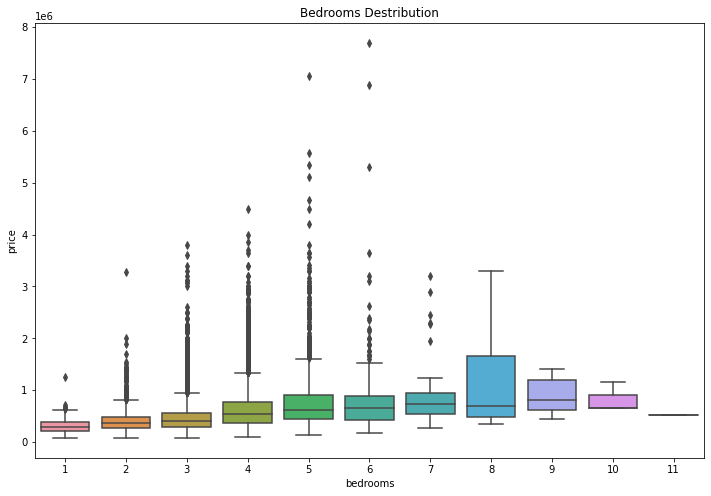

In [21]:
plt.figure(figsize=(12,8))
plt.title("Bedrooms Destribution");
sns.boxplot(x='bedrooms',y='price',data=df);

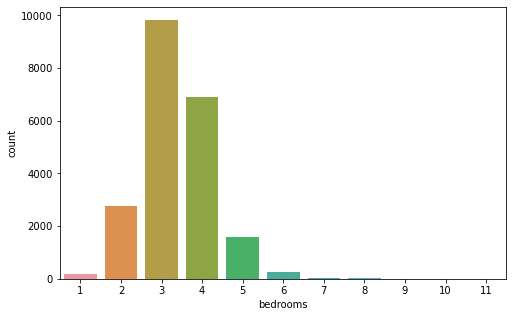

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x="bedrooms",data=df);

## Location of high prices houses

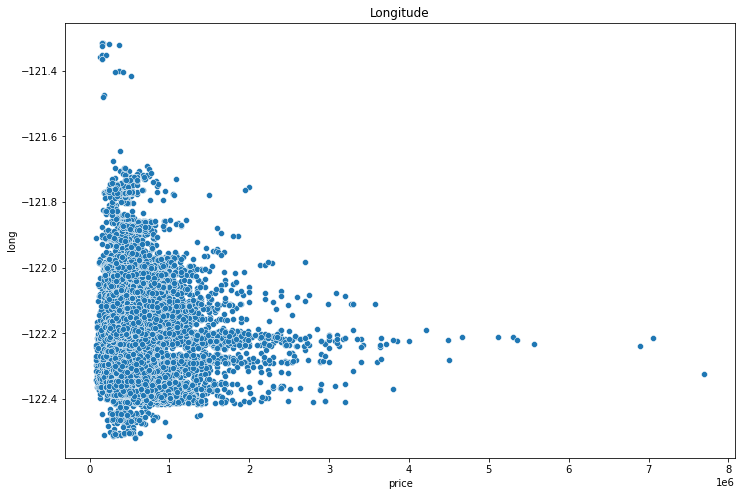

In [23]:
plt.figure(figsize=(12,8))
plt.title("Longitude");
sns.scatterplot(x="price",y="long",data=df);

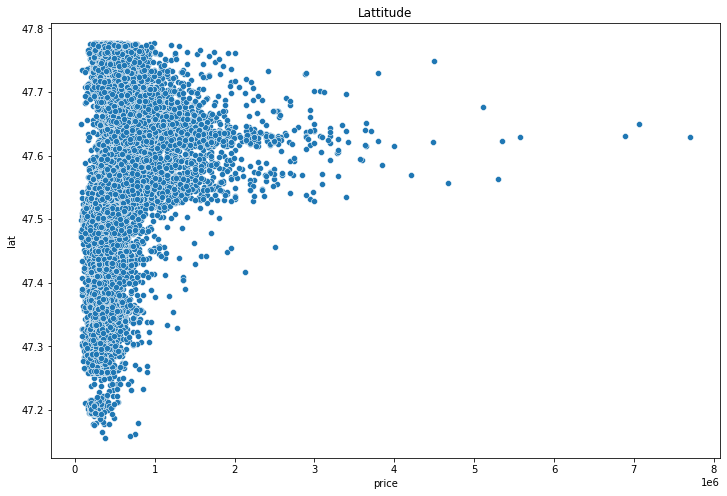

In [24]:
plt.figure(figsize=(12,8))
plt.title("Lattitude");
sns.scatterplot(x="price",y="lat",data=df);

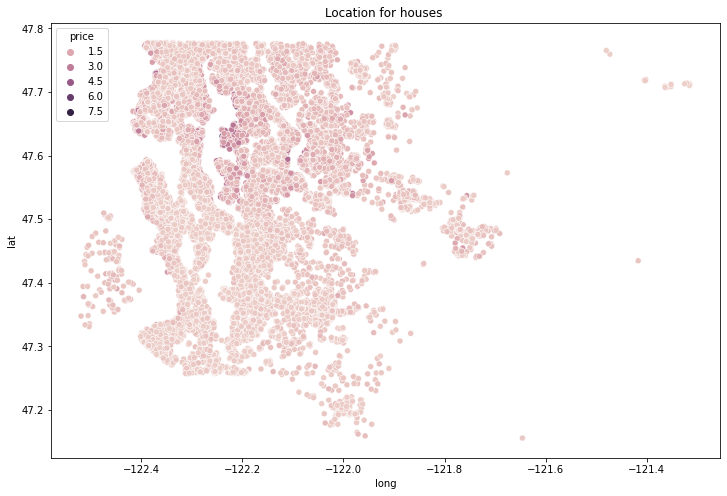

In [25]:
plt.figure(figsize=(12,8))
plt.title("Location for houses ");
sns.scatterplot(x="long",y="lat",data=df,hue="price");

It's not so obvious the locations of the high prices houses so we will negligt top 1% of the houses and redraw it.

In [26]:
len(df)*0.01

215.96

In [27]:
# Neglect top 1% of the data (outliers) for seeing it clearly
non_top_1_perc = df.sort_values("price",ascending=False)[216:]

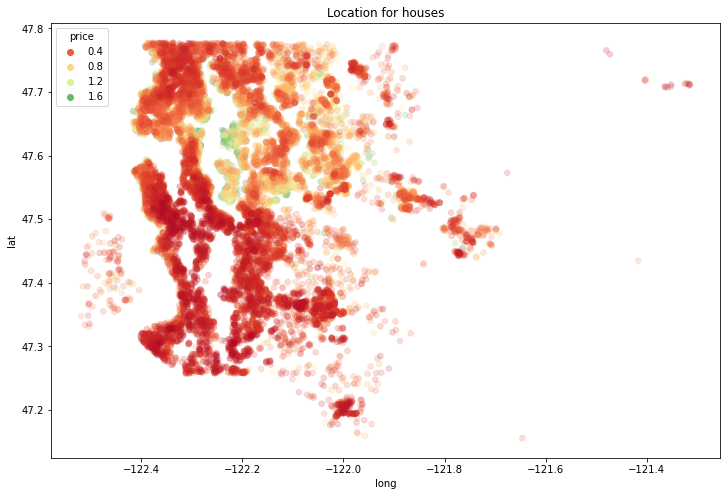

In [28]:
plt.figure(figsize=(12,8))
plt.title("Location for houses");
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2);

## Waterfront Destribution


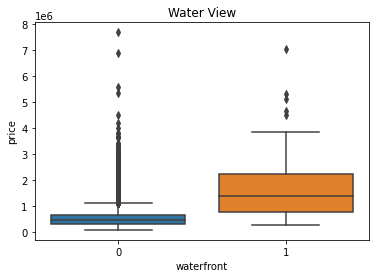

In [29]:
sns.boxplot(x="waterfront",y="price",data=df);
plt.title("Water View");

<a id='ML'></a>
# Machine Learning Models

## Train Test Split

In [30]:
X = df.drop("price",axis=1).values
y = df["price"].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Linear Regression


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
Lm = LinearRegression()

In [34]:
Lm.fit(X_train,y_train)

LinearRegression()

In [35]:
pred_lm = Lm.predict(X_test)

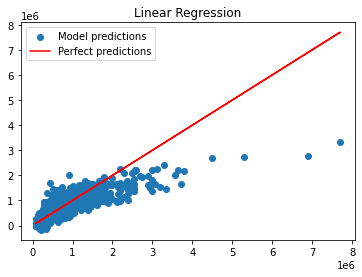

In [36]:
plt.scatter(y_test,pred_lm,label="Model predictions")
plt.title("Linear Regression")
plt.plot(y_test,y_test,"r",label="Perfect predictions");
plt.legend();

## Polynomial Regression


In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly_train,y_train)

LinearRegression()

In [38]:
poly_pred = lin_reg2.predict(X_poly_test)

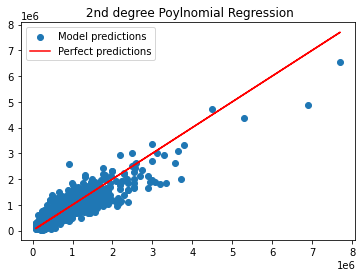

In [39]:
plt.scatter(y_test,poly_pred,label="Model predictions")
plt.title(" 2nd degree Poylnomial Regression")
plt.plot(y_test,y_test, color="r",label="Perfect predictions");
plt.legend();

## SVR (Support Vector Regression)

In [40]:
#scaling the data
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
X_train_scaled = sc1.fit_transform(X_train)
X_test_scaled = sc1.transform(X_test)

In [41]:
sc2=StandardScaler()
y_train_scaled = np.ravel(sc2.fit_transform(y_train.reshape(-1,1)))
y_test_scaled = np.ravel(sc2.transform(y_test.reshape(-1,1)))

In [42]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled,y_train_scaled)

SVR()

In [43]:
svr_pred = svr_reg.predict(X_test_scaled)

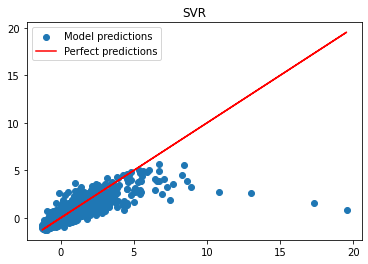

In [44]:
plt.scatter(y_test_scaled,svr_pred,label="Model predictions")
plt.title("SVR")
plt.plot(y_test_scaled,y_test_scaled, color="r",label="Perfect predictions");
plt.legend();

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [46]:
dt_pred = dt.predict(X_test)

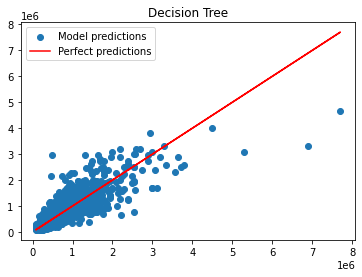

In [47]:
plt.scatter(y_test,dt_pred,label="Model predictions")
plt.title("Decision Tree")
plt.plot(y_test,y_test, color="r",label="Perfect predictions");
plt.legend();

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 200,random_state=0)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [49]:
rf_pred = rf_reg.predict(X_test)

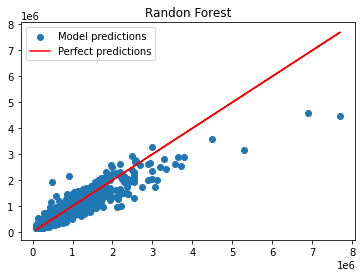

In [50]:
plt.scatter(y_test,rf_pred,label="Model predictions")
plt.title("Randon Forest")
plt.plot(y_test,y_test, color="r",label="Perfect predictions");
plt.legend();

## Compering between different Models

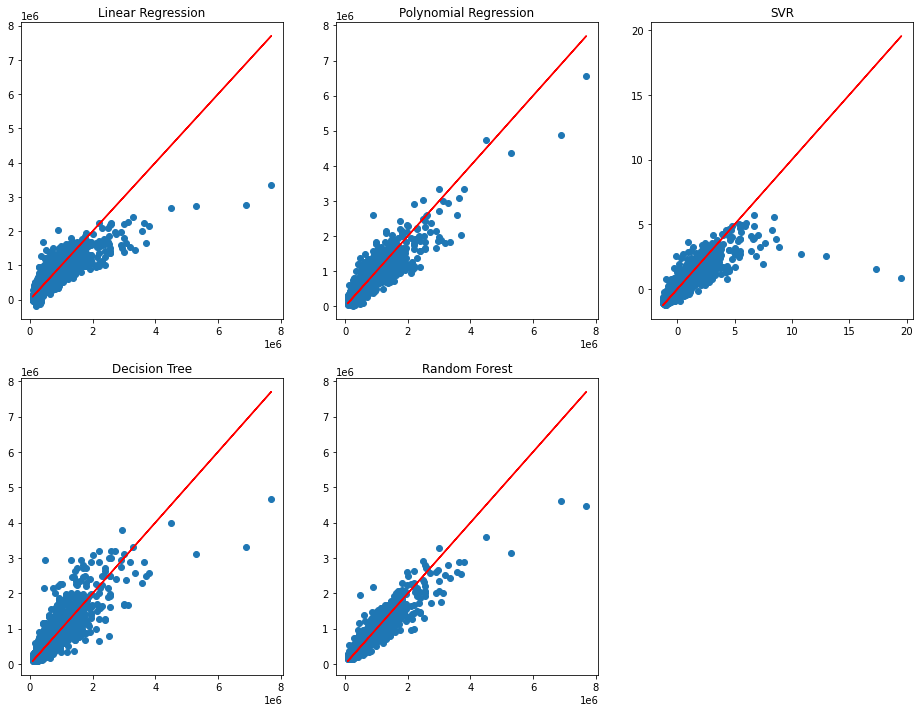

In [51]:
# Regression Graphs - Subplot
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
plt.scatter(y_test,pred_lm)
plt.plot(y_test,y_test, color="r");
plt.title('Linear Regression')

plt.subplot(2,3,2)
plt.scatter(y_test,poly_pred)
plt.plot(y_test,y_test, color="r");
plt.title('Polynomial Regression')

plt.subplot(2,3,3)
plt.scatter(y_test_scaled,svr_pred)
plt.plot(y_test_scaled,y_test_scaled, color="r");
plt.title('SVR')

plt.subplot(2,3,4)
plt.scatter(y_test,dt_pred)
plt.plot(y_test,y_test, color="r");
plt.title('Decision Tree')

plt.subplot(2,3,5)
plt.scatter(y_test,rf_pred)
plt.plot(y_test,y_test, color="r");
plt.title('Random Forest');

In [52]:
#Creation of R² scores
from sklearn.metrics import r2_score

r2_lin = r2_score(y_test,pred_lm)*100
r2_poly = r2_score(y_test, poly_pred)*100
r2_SVR = r2_score(y_test_scaled, svr_pred)*100
r2_dt = r2_score(y_test, dt_pred)*100
r2_rf = r2_score(y_test, rf_pred)*100

------------- R² SCORES OF MODELS ----------------

Linear Regression R² Score     : 69.66588994520913
Polynomial Regression R² Score : 81.82683585013865
SVR R² Score                   : 73.12802618589993
Decision Tree R² Score         : 74.6984660600115
Random Forest R² Score         : 87.63680507347738


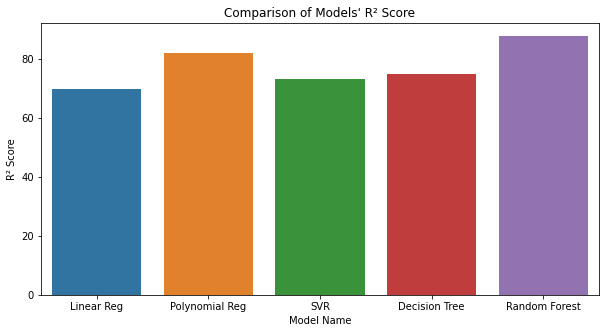

In [53]:
#Bar Graph Display of R² Scores

models_names = ['Linear Reg', 'Polynomial Reg', 'SVR', 'Decision Tree', 'Random Forest']
models_r2s = [r2_lin,r2_poly,r2_SVR,r2_dt,r2_rf]
plt.figure(figsize=(10,5))
sns.barplot(x=models_names,y=models_r2s);
plt.title("Comparison of Models' R² Score");
plt.xlabel("Model Name");
plt.ylabel("R² Score");

#Printing R² scores
print("------------- R² SCORES OF MODELS ----------------\n")
print(f'Linear Regression R² Score     : {r2_lin}')
print(f'Polynomial Regression R² Score : {r2_poly}')
print(f'SVR R² Score                   : {r2_SVR}')
print(f'Decision Tree R² Score         : {r2_dt}')
print(f'Random Forest R² Score         : {r2_rf}')

I think the most successful model for regression of this dataset is 'Random Forest'.
but we will repeat all models by neglecting top prices houses ( 1% of our dataset ) to make our models predict better.

<a id='RM'></a>
# Retreain models with neglect of 1% of top price houses

## Train Test Split

In [54]:
X = non_top_1_perc.drop("price",axis=1).values
y = non_top_1_perc["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Linear Regression


In [55]:
Lm.fit(X_train,y_train)

LinearRegression()

In [56]:
pred_lm = Lm.predict(X_test)

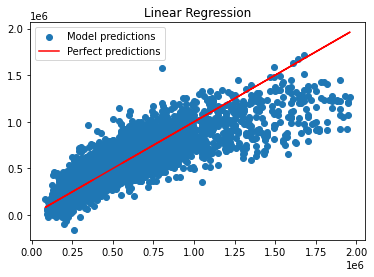

In [57]:
plt.scatter(y_test,pred_lm,label="Model predictions")
plt.title("Linear Regression")
plt.plot(y_test,y_test,"r",label="Perfect predictions");
plt.legend();

## Polynomial Regression


In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly_train,y_train)

LinearRegression()

In [59]:
poly_pred = lin_reg2.predict(X_poly_test)

In [60]:
poly_pred_new = poly_pred[poly_pred>0]

In [61]:
y_test_new = []
for i in range(len(poly_pred)):
    if poly_pred[i]>0:
        y_test_new.append(y_test[i])  

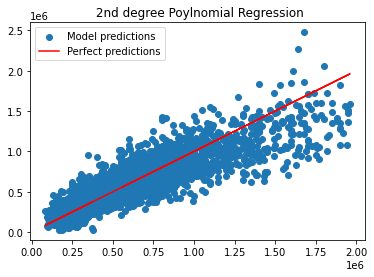

In [62]:
plt.scatter(y_test_new,poly_pred_new,label="Model predictions")
plt.title(" 2nd degree Poylnomial Regression")
plt.plot(y_test,y_test, color="r",label="Perfect predictions");
plt.legend();

## SVR (Support Vector Regression)

In [63]:
#scaling the data
X_train_scaled = sc1.fit_transform(X_train)
X_test_scaled = sc1.transform(X_test)

In [64]:
y_train_scaled = np.ravel(sc2.fit_transform(y_train.reshape(-1,1)))
y_test_scaled = np.ravel(sc2.transform(y_test.reshape(-1,1)))

In [65]:
svr_reg.fit(X_train_scaled,y_train_scaled)

SVR()

In [66]:
svr_pred = svr_reg.predict(X_test_scaled)

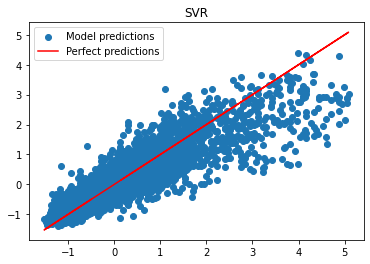

In [67]:
plt.scatter(y_test_scaled,svr_pred,label="Model predictions")
plt.title("SVR")
plt.plot(y_test_scaled,y_test_scaled, color="r",label="Perfect predictions");
plt.legend();

## Decision Tree

In [68]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [69]:
dt_pred = dt.predict(X_test)

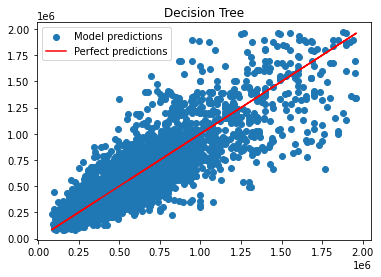

In [70]:
plt.scatter(y_test,dt_pred,label="Model predictions")
plt.title("Decision Tree")
plt.plot(y_test,y_test, color="r",label="Perfect predictions");
plt.legend();

## Random Forest


In [71]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [72]:
rf_pred = rf_reg.predict(X_test)

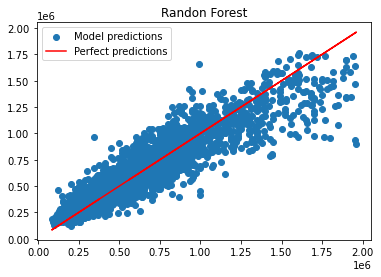

In [73]:
plt.scatter(y_test,rf_pred,label="Model predictions")
plt.title("Randon Forest")
plt.plot(y_test,y_test, color="r",label="Perfect predictions");
plt.legend();

## Compering between different Models


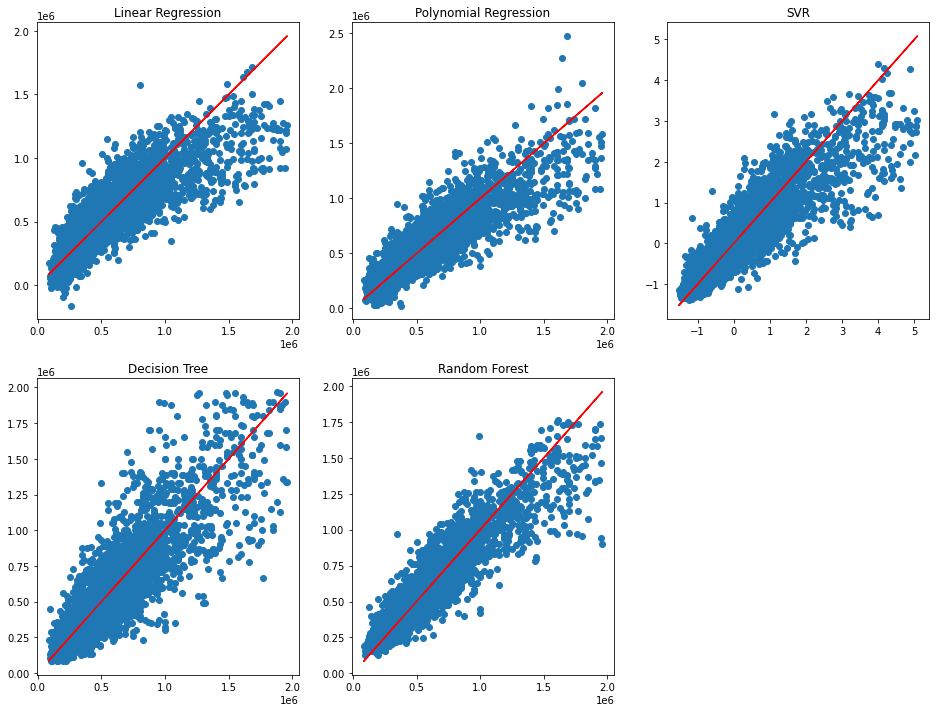

In [74]:
# Regression Graphs - Subplot
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
plt.scatter(y_test,pred_lm)
plt.plot(y_test,y_test, color="r");
plt.title('Linear Regression')

plt.subplot(2,3,2)
plt.scatter(y_test_new,poly_pred_new)
plt.plot(y_test,y_test, color="r");
plt.title('Polynomial Regression')

plt.subplot(2,3,3)
plt.scatter(y_test_scaled,svr_pred)
plt.plot(y_test_scaled,y_test_scaled, color="r");
plt.title('SVR')

plt.subplot(2,3,4)
plt.scatter(y_test,dt_pred)
plt.plot(y_test,y_test, color="r");
plt.title('Decision Tree')

plt.subplot(2,3,5)
plt.scatter(y_test,rf_pred)
plt.plot(y_test,y_test, color="r");
plt.title('Random Forest');

In [75]:
#Creation of R² scores
from sklearn.metrics import r2_score

r2_lin = r2_score(y_test,pred_lm)*100
r2_poly = r2_score(y_test_new, poly_pred_new)*100
r2_SVR = r2_score(y_test_scaled, svr_pred)*100
r2_dt = r2_score(y_test, dt_pred)*100
r2_rf = r2_score(y_test, rf_pred)*100

------------- R² SCORES OF MODELS ----------------

Linear Regression R² Score     : 71.03272695263605
Polynomial Regression R² Score : 77.37390349249871
SVR R² Score                   : 80.90446348808162
Decision Tree R² Score         : 74.495167310763
Random Forest R² Score         : 87.05429838072874


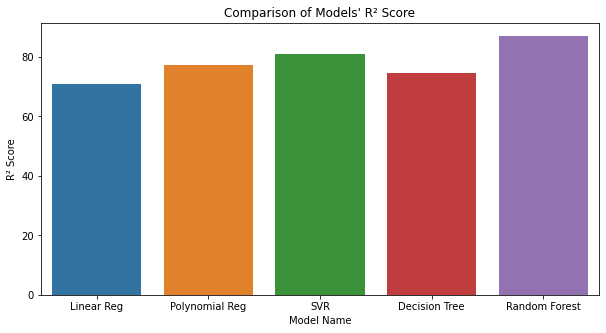

In [76]:
#Bar Graph Display of R² Scores

models_names = ['Linear Reg', 'Polynomial Reg', 'SVR', 'Decision Tree', 'Random Forest']
models_r2s = [r2_lin,r2_poly,r2_SVR,r2_dt,r2_rf]
plt.figure(figsize=(10,5))
sns.barplot(x=models_names,y=models_r2s);
plt.title("Comparison of Models' R² Score");
plt.xlabel("Model Name");
plt.ylabel("R² Score");

#Printing R² scores
print("------------- R² SCORES OF MODELS ----------------\n")
print(f'Linear Regression R² Score     : {r2_lin}')
print(f'Polynomial Regression R² Score : {r2_poly}')
print(f'SVR R² Score                   : {r2_SVR}')
print(f'Decision Tree R² Score         : {r2_dt}')
print(f'Random Forest R² Score         : {r2_rf}')

After neglecting top price houses it aslo look like that 'Random Forest' is the most succesful ML model. 
######  Now we well try the same data but with Deep Learning Model.

<a id='DM'></a>
# DeepLeaning Model

## Train Test Split

In [77]:
X = df.drop("price",axis=1).values
y = df["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [79]:
X_train = scaler.fit_transform(X_train)

In [80]:
X_test = scaler.transform(X_test)

## Creating a Model

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [83]:
model = Sequential()

model.add(Dense(19,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(19,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(19,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(19,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [84]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400,callbacks=[early_stop])

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 427114856448.0000 - val_loss: 426258268160.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 425504735232.0000 - val_loss: 419170713600.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 387626401792.0000 - val_loss: 322653650944.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 236634767360.0000 - val_loss: 135416594432.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 176009789440.0000 - val_loss: 120060821504.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 170679320576.0000 - val_loss: 118243262464.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 168601239552.0000 - val_loss: 116120461312.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 168241561600.0000 - val_loss: 112024117248.0000
Epoch 9/400
119/

119/119 [==============================] - 0s 3ms/step - loss: 123058339840.0000 - val_loss: 64162103296.0000
Epoch 68/400
119/119 [==============================] - 0s 3ms/step - loss: 120994463744.0000 - val_loss: 61234765824.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 119630782464.0000 - val_loss: 61916921856.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 122550968320.0000 - val_loss: 61037776896.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 118586630144.0000 - val_loss: 58041794560.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 121414991872.0000 - val_loss: 63564251136.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 119015235584.0000 - val_loss: 60392628224.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 118875463680.0000 - val_loss: 58367143936.0000
Epoch 75/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 107618500608.0000 - val_loss: 50969395200.0000
Epoch 134/400
119/119 [==============================] - 0s 3ms/step - loss: 107248287744.0000 - val_loss: 54700441600.0000
Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 106892148736.0000 - val_loss: 52359188480.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 109875871744.0000 - val_loss: 54794526720.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 112855252992.0000 - val_loss: 52510883840.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 110501978112.0000 - val_loss: 51883081728.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 107937579008.0000 - val_loss: 51904376832.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 107886501888.0000 - val_loss: 52575805440.0000
Epoch 141/400
119/119 

119/119 [==============================] - 0s 4ms/step - loss: 105706463232.0000 - val_loss: 47122571264.0000
Epoch 200/400
119/119 [==============================] - 0s 3ms/step - loss: 108153315328.0000 - val_loss: 48950829056.0000
Epoch 201/400
119/119 [==============================] - 0s 3ms/step - loss: 103468957696.0000 - val_loss: 49527889920.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 105662808064.0000 - val_loss: 47997423616.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 103586357248.0000 - val_loss: 47462854656.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 107172765696.0000 - val_loss: 48817053696.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 106726277120.0000 - val_loss: 51108982784.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 103708811264.0000 - val_loss: 47857852416.0000
Epoch 207/400
119/119 

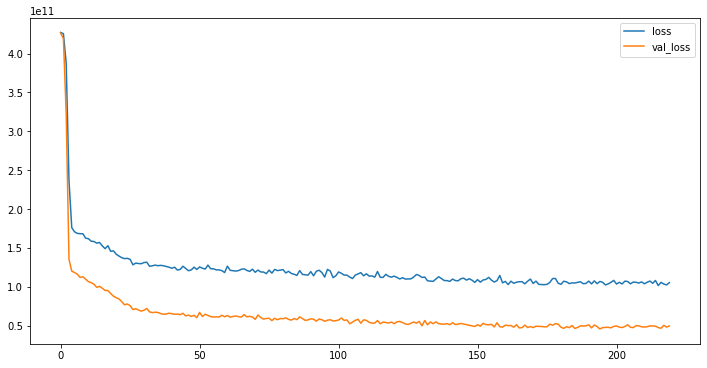

In [85]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(12,6));

In [86]:
pred_deep = model.predict(X_test)

203/203 [==============================] - 0s 814us/step


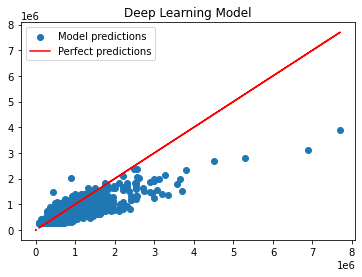

In [87]:
plt.scatter(y_test,pred_deep,label="Model predictions")
plt.plot(y_test,y_test,"r",label="Perfect predictions");
plt.title("Deep Learning Model")
plt.plot(y_test_scaled,y_test_scaled, color="r");
plt.legend();

In [88]:
r2_deep = r2_score(y_test,pred_deep)*100
print(f'DeepLearning Model R² Score     : {r2_deep}')

DeepLearning Model R² Score     : 63.78669346259996


## Retreain models with neglect of 1% of top price houses

In [89]:
X = non_top_1_perc.drop("price",axis=1).values
y = non_top_1_perc["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
model = Sequential()

model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [91]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400,callbacks=[early_stop])

Epoch 1/400
117/117 [==============================] - 1s 4ms/step - loss: 346873135104.0000 - val_loss: 356834934784.0000
Epoch 2/400
117/117 [==============================] - 0s 3ms/step - loss: 346050396160.0000 - val_loss: 353889615872.0000
Epoch 3/400
117/117 [==============================] - 0s 3ms/step - loss: 333678608384.0000 - val_loss: 324137582592.0000
Epoch 4/400
117/117 [==============================] - 0s 3ms/step - loss: 269225984000.0000 - val_loss: 213915893760.0000
Epoch 5/400
117/117 [==============================] - 0s 3ms/step - loss: 135184646144.0000 - val_loss: 79921643520.0000
Epoch 6/400
117/117 [==============================] - 0s 3ms/step - loss: 62014017536.0000 - val_loss: 58418888704.0000
Epoch 7/400
117/117 [==============================] - 0s 3ms/step - loss: 56609861632.0000 - val_loss: 57258577920.0000
Epoch 8/400
117/117 [==============================] - 0s 3ms/step - loss: 55692308480.0000 - val_loss: 56378167296.0000
Epoch 9/400
117/117 [==

117/117 [==============================] - 0s 3ms/step - loss: 23674658816.0000 - val_loss: 24720295936.0000
Epoch 69/400
117/117 [==============================] - 0s 3ms/step - loss: 23699032064.0000 - val_loss: 24667680768.0000
Epoch 70/400
117/117 [==============================] - 0s 3ms/step - loss: 23656749056.0000 - val_loss: 24604592128.0000
Epoch 71/400
117/117 [==============================] - 0s 3ms/step - loss: 23641677824.0000 - val_loss: 24560908288.0000
Epoch 72/400
117/117 [==============================] - 0s 3ms/step - loss: 23615854592.0000 - val_loss: 24533131264.0000
Epoch 73/400
117/117 [==============================] - 0s 3ms/step - loss: 23603443712.0000 - val_loss: 24490444800.0000
Epoch 74/400
117/117 [==============================] - 0s 3ms/step - loss: 23571331072.0000 - val_loss: 24469587968.0000
Epoch 75/400
117/117 [==============================] - 0s 3ms/step - loss: 23555825664.0000 - val_loss: 24449171456.0000
Epoch 76/400
117/117 [===============

Epoch 135/400
117/117 [==============================] - 0s 3ms/step - loss: 22674206720.0000 - val_loss: 23647416320.0000
Epoch 136/400
117/117 [==============================] - 0s 3ms/step - loss: 22668449792.0000 - val_loss: 23488538624.0000
Epoch 137/400
117/117 [==============================] - 0s 3ms/step - loss: 22660407296.0000 - val_loss: 23486928896.0000
Epoch 138/400
117/117 [==============================] - 0s 2ms/step - loss: 22649024512.0000 - val_loss: 23568609280.0000
Epoch 139/400
117/117 [==============================] - 0s 3ms/step - loss: 22622382080.0000 - val_loss: 23474165760.0000
Epoch 140/400
117/117 [==============================] - 0s 3ms/step - loss: 22621915136.0000 - val_loss: 23452182528.0000
Epoch 141/400
117/117 [==============================] - 0s 3ms/step - loss: 22599364608.0000 - val_loss: 23447971840.0000
Epoch 142/400
117/117 [==============================] - 0s 3ms/step - loss: 22611562496.0000 - val_loss: 23434362880.0000
Epoch 143/400
11

117/117 [==============================] - 0s 3ms/step - loss: 21753890816.0000 - val_loss: 22801541120.0000
Epoch 202/400
117/117 [==============================] - 0s 3ms/step - loss: 21780598784.0000 - val_loss: 22660052992.0000
Epoch 203/400
117/117 [==============================] - 0s 3ms/step - loss: 21760309248.0000 - val_loss: 22667208704.0000
Epoch 204/400
117/117 [==============================] - 0s 3ms/step - loss: 21726851072.0000 - val_loss: 22647828480.0000
Epoch 205/400
117/117 [==============================] - 0s 3ms/step - loss: 21731667968.0000 - val_loss: 22656468992.0000
Epoch 206/400
117/117 [==============================] - 0s 3ms/step - loss: 21711943680.0000 - val_loss: 22651023360.0000
Epoch 207/400
117/117 [==============================] - 0s 3ms/step - loss: 21733990400.0000 - val_loss: 22632882176.0000
Epoch 208/400
117/117 [==============================] - 0s 3ms/step - loss: 21701515264.0000 - val_loss: 22638069760.0000
Epoch 209/400
117/117 [=======

117/117 [==============================] - 0s 3ms/step - loss: 21351319552.0000 - val_loss: 22378665984.0000
Epoch 268/400
117/117 [==============================] - 0s 3ms/step - loss: 21347465216.0000 - val_loss: 22356998144.0000
Epoch 269/400
117/117 [==============================] - 0s 3ms/step - loss: 21329309696.0000 - val_loss: 22354538496.0000
Epoch 270/400
117/117 [==============================] - 0s 3ms/step - loss: 21313923072.0000 - val_loss: 22354155520.0000
Epoch 271/400
117/117 [==============================] - 0s 3ms/step - loss: 21342312448.0000 - val_loss: 22361366528.0000
Epoch 272/400
117/117 [==============================] - 0s 3ms/step - loss: 21317074944.0000 - val_loss: 22346776576.0000
Epoch 273/400
117/117 [==============================] - 0s 3ms/step - loss: 21301190656.0000 - val_loss: 22373767168.0000
Epoch 274/400
117/117 [==============================] - 0s 3ms/step - loss: 21308878848.0000 - val_loss: 22425993216.0000
Epoch 275/400
117/117 [=======

117/117 [==============================] - 0s 3ms/step - loss: 21057142784.0000 - val_loss: 22199332864.0000
Epoch 334/400
117/117 [==============================] - 0s 3ms/step - loss: 21040603136.0000 - val_loss: 22135252992.0000
Epoch 335/400
117/117 [==============================] - 0s 3ms/step - loss: 21057822720.0000 - val_loss: 22134222848.0000
Epoch 336/400
117/117 [==============================] - 0s 3ms/step - loss: 21047742464.0000 - val_loss: 22169931776.0000
Epoch 337/400
117/117 [==============================] - 0s 3ms/step - loss: 21029490688.0000 - val_loss: 22248908800.0000
Epoch 338/400
117/117 [==============================] - 0s 3ms/step - loss: 21055991808.0000 - val_loss: 22126594048.0000
Epoch 339/400
117/117 [==============================] - 0s 3ms/step - loss: 21026197504.0000 - val_loss: 22129127424.0000
Epoch 340/400
117/117 [==============================] - 0s 3ms/step - loss: 21032744960.0000 - val_loss: 22123124736.0000
Epoch 341/400
117/117 [=======

117/117 [==============================] - 0s 3ms/step - loss: 20810876928.0000 - val_loss: 21943742464.0000
Epoch 400/400
117/117 [==============================] - 0s 3ms/step - loss: 20833445888.0000 - val_loss: 21943994368.0000


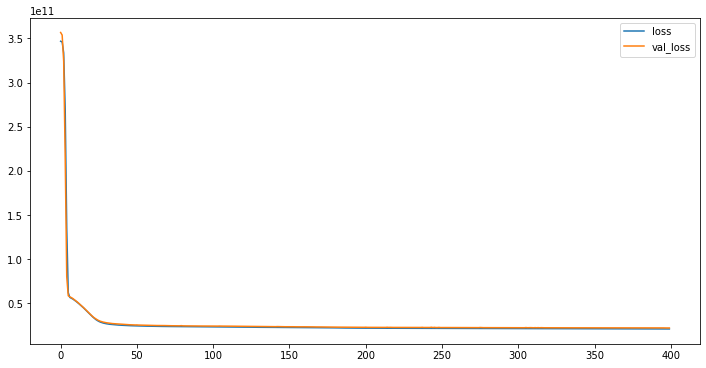

In [92]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(12,6));

In [93]:
pred_deep = model.predict(X_test)

201/201 [==============================] - 0s 821us/step


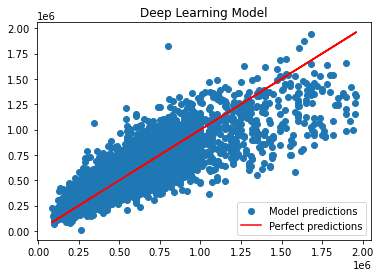

In [94]:
plt.scatter(y_test,pred_deep,label="Model predictions")
plt.plot(y_test,y_test,"r",label="Perfect predictions");
plt.title("Deep Learning Model")
plt.plot(y_test,y_test, color="r");
plt.legend();

In [95]:
r2_deep = r2_score(y_test,pred_deep)*100
print(f'DeepLearning Model R² Score     : {r2_deep}')

DeepLearning Model R² Score     : 73.37014996744135
